In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Description of Dataset

File contains 14 columns and 5000 rows. Description of the columns are as follows:

* ID: Customer ID
* Age : Customer Age
* Experience : Customer Experience
* Income : Income of the Customer
* ZipCode: Customer's residence zipcode
* Family : No of Family members of the customer
* CCAvg: Credit Card Average Score
* Education: Education of the customer
* Mortgage: Mortgage taken or not taken by the customer
* Personal Loan: 0 = No personal loan given , 1 = personal loan given
* Securities Account : Having or not having a Securities Account
* CD Account : Having or not having a CD Account
* Online : Having or not having online banking
* Credit Card : Having or not having a credit card

In [2]:
df = pd.read_csv('bankloan.csv')

df.head(10)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# Exploratory Data Analysis

In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.duplicated().sum()

0

Let's Check Outliers in our Columns

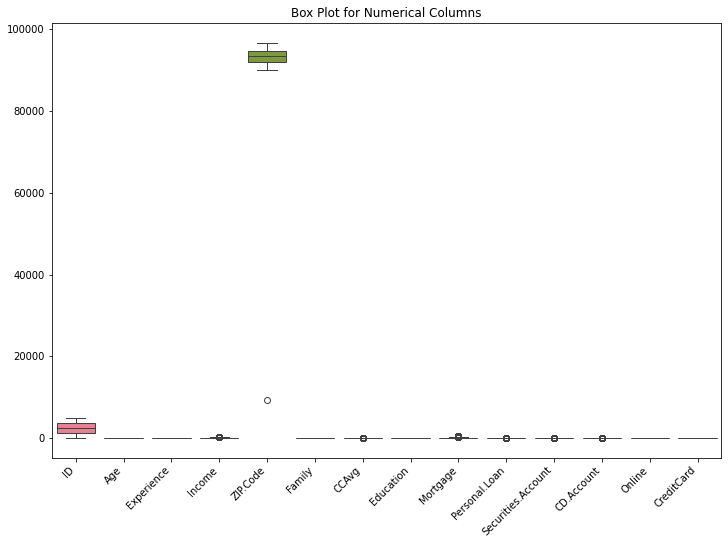

In [6]:

numerical_columns = df.select_dtypes(include=['number'])


plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns)
plt.title("Box Plot for Numerical Columns")


plt.xticks(rotation=45, ha="right")


plt.show()

as we look at Box plots we have outliers in `Zip_code` column. Thus We Won't use it in Predictive Modeling then we will drop it

# Data Preprocessing

In [7]:

df.columns = [col.replace('.', '_') for col in df.columns]

# Baseline Model

In [8]:
# assuming 'ZIP_Code' and 'Personal_Loan' are columns in the dataFrame
X = df.drop(['ZIP_Code', 'Personal_Loan', 'ID'], axis=1)  
y = df['Personal_Loan']  # target variable

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline with different classifiers
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# fitting the pipelines
pipeline_rf.fit(X_train, y_train)
pipeline_svm.fit(X_train, y_train)
pipeline_lr.fit(X_train, y_train)

# predictions
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_lr = pipeline_lr.predict(X_test)

# performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Random Forest Accuracy:", accuracy_rf)
print("SVM Accuracy:", accuracy_svm)
print("Logistic Regression Accuracy:", accuracy_lr)

Random Forest Accuracy: 0.99
SVM Accuracy: 0.976
Logistic Regression Accuracy: 0.955


# Hyperparameter Tuning

Through this code we will use `GridSearchCV` and will print Best parameters can get Higher Performance

In [10]:
# hyperparameter grids for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}


pipeline_rf_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5))
])

# cross-validation and hyperparameter tuning
pipeline_rf_cv.fit(X_train, y_train)

# best hyperparameters and predictions
y_pred_rf_cv = pipeline_rf_cv.predict(X_test)


accuracy_rf_cv = accuracy_score(y_test, y_pred_rf_cv)
print("Random Forest Accuracy (with CV):", accuracy_rf_cv)


best_params_rf = pipeline_rf_cv.named_steps['classifier'].best_params_
print("\nBest Hyperparameters for RandomForestClassifier:")
print(best_params_rf)

Random Forest Accuracy (with CV): 0.989

Best Hyperparameters for RandomForestClassifier:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


# Model Evaluation

When using pipelines, model evaluation remains consistent with traditional workflows. The key advantage of pipelines is the seamless integration of preprocessing and modeling steps, making the overall process cleaner and more modular.

In [11]:

classification_rep = classification_report(y_test, y_pred_rf_cv)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.91      0.95       105

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



# Compare Scores and Values

In [12]:

pipeline_rf_cv.fit(X_train, y_train)


y_pred_train = pipeline_rf_cv.predict(X_train)


y_pred_test = pipeline_rf_cv.predict(X_test)


accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Set Accuracy:", accuracy_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

Training Set Accuracy: 0.998
Test Set Accuracy: 0.991


In [13]:

for actual, predicted in zip(y_test, y_pred_rf_cv):
    print(f"Actual: {actual}, Predicted: {predicted}")

# performance eval
accuracy_rf = accuracy_score(y_test, y_pred_rf_cv)
print("Random Forest Accuracy:", accuracy_rf)


Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predi